<center><h1> <font color='green'>Prueba  Analisis Estadistico con Python</font></h1></center>
<center><h1> <font color='yellow'>Vinka Arias Barrios</font></h1></center>

In [82]:
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap
#importamos scipy.stats que ayudará a generar distribuciones
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, skew, stats
import plotly.express as px
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import resample



<left><h1> <font color='yellow'> 1.  Carga los datos y explóralos. Elimina los datos nulos o incorrectos .
</font></h1><left>

In [85]:
## Leer archivo csv 
dataset = pd.read_csv("cardio.csv") 
dataset.shape
#dataset tiene 4238 filas y 16 columnas

(4238, 16)

In [87]:
dataset.info()
#vemos que  no todas las columnas tiene 4238 filas por lo tanto  hay que limpiar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [89]:
# Paso 1: Eliminar valores NaN 
dataset = dataset.dropna()

# Paso 2: Eliminar filas duplicadas
dataset = dataset.drop_duplicates()
dataset

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,M,58,3.0,No,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,M,68,1.0,No,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [91]:
dataset.shape
#nos muestra que tiene 3656 filas y 16

(3656, 16)

In [93]:
dataset.info()
#vemos que todas las columna tiene 3656 filas por lo tanto no hay repetidos

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


In [95]:
print(dataset.isnull().sum())
#validacion datos faltantes: 0

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [97]:
dataset["currentSmoker"].unique()

array(['No', 'Yes'], dtype=object)

In [99]:
dataset["sex"].unique()

array(['M', 'F'], dtype=object)

In [101]:
#Transformare las variables catageoricas a cuantitativas
dataset['sex_numero'] =  np.where(dataset['sex']   == 'M', 1, 0)

dataset['currentSmoker_numero'] =  np.where(dataset['currentSmoker'] == 'Yes', 1, 0)

dataset['sex_numero'] = dataset['sex_numero'].astype('int64')   
dataset['currentSmoker_numero'] = dataset['currentSmoker_numero'].astype('int64') 

dataset.dtypes


sex                      object
age                       int64
education               float64
currentSmoker            object
cigsPerDay              float64
BPMeds                  float64
prevalentStroke           int64
prevalentHyp              int64
diabetes                  int64
totChol                 float64
sysBP                   float64
diaBP                   float64
BMI                     float64
heartRate               float64
glucose                 float64
TenYearCHD                int64
sex_numero                int64
currentSmoker_numero      int64
dtype: object

<left><h1> <font color='yellow'>2- Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?
</font></h1><left>


In [104]:
# Selección de tres variables cuantitativas para el análisis descriptivo: Nivel Educacion, Colesterol y Glucosa
#dataset_limpio = dataset_limpio
variables = ['education', 'totChol', 'glucose']
# Análisis descriptivo de las variables seleccionadas
print(dataset[variables].describe())


         education      totChol      glucose
count  3656.000000  3656.000000  3656.000000
mean      1.979759   236.873085    81.856127
std       1.022657    44.096223    23.910128
min       1.000000   113.000000    40.000000
25%       1.000000   206.000000    71.000000
50%       2.000000   234.000000    78.000000
75%       3.000000   263.250000    87.000000
max       4.000000   600.000000   394.000000


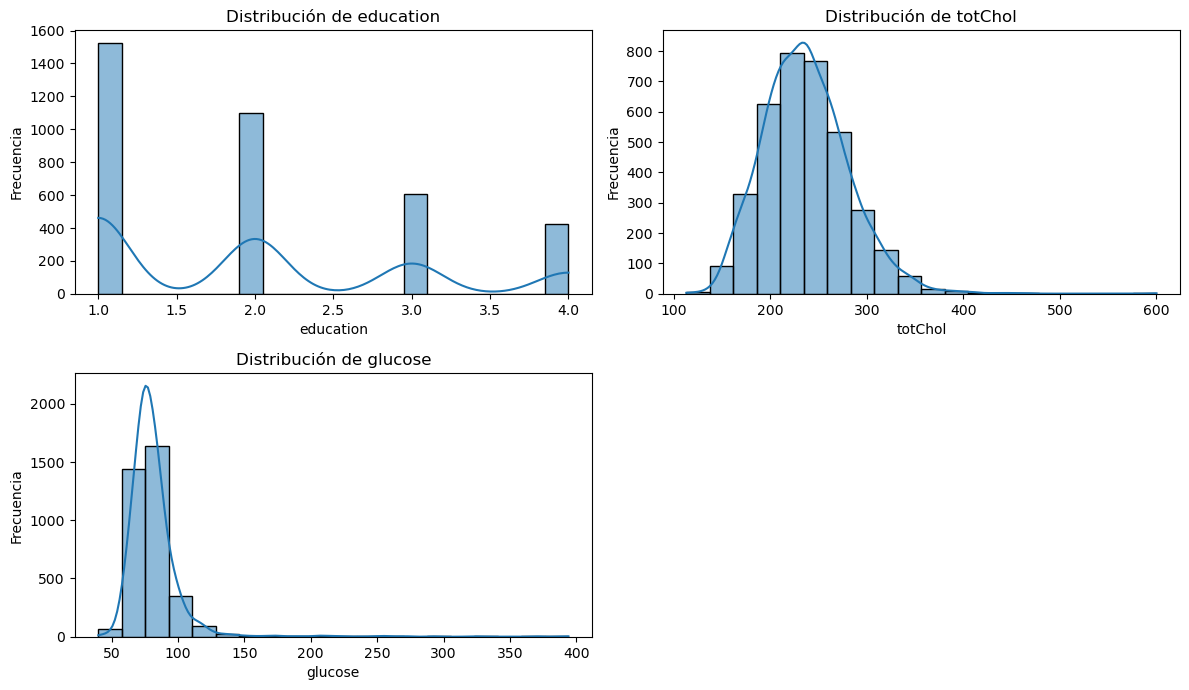

In [106]:

# Gráficos de distribución para las 3  variables seleccionadas


plt.figure(figsize=(12, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[col].dropna(), bins=20, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()





In [107]:
# De las variables escogidas : Educacion, colesterol y glicemia la que presenta mayor dispercion es la variable Colesterol total, 
# porque la desviacion estandar de 44.10 es la mayor de las 3 variables además tiene una distribucion normal los valores as altos se encuentran
# cerca de la #media. Se observa en esta variable la muy probable presencia de valores outliers dado que el valor 400 es muy poco probable.

<left><h1> <font color='yellow'>3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el
dataset limpia
</font></h1><left>

In [111]:


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df



# Aplicar eliminación de outliers a las variables cuantitativas
quantitative_columns = dataset.select_dtypes(include='number').dropna()
dataset_no_outliers = remove_outliers_iqr(dataset, quantitative_columns)

print("Datos después de eliminar outliers:", dataset_no_outliers.shape)

Datos después de eliminar outliers: (2638, 18)


In [113]:

dataset_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2638 entries, 0 to 4234
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   2638 non-null   object 
 1   age                   2638 non-null   int64  
 2   education             2638 non-null   float64
 3   currentSmoker         2638 non-null   object 
 4   cigsPerDay            2638 non-null   float64
 5   BPMeds                2638 non-null   float64
 6   prevalentStroke       2638 non-null   int64  
 7   prevalentHyp          2638 non-null   int64  
 8   diabetes              2638 non-null   int64  
 9   totChol               2638 non-null   float64
 10  sysBP                 2638 non-null   float64
 11  diaBP                 2638 non-null   float64
 12  BMI                   2638 non-null   float64
 13  heartRate             2638 non-null   float64
 14  glucose               2638 non-null   float64
 15  TenYearCHD            2638


<left><h2> <font color='yellow'> 4. ¿Qué variables cuantitativas presentan mayor correlación? Explica  </left></h2>></left>



In [117]:
dataset_no_outliers_cuantitativas = dataset_no_outliers.select_dtypes(include='number').dropna()
dataset_no_outliers_cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2638 entries, 0 to 4234
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2638 non-null   int64  
 1   education             2638 non-null   float64
 2   cigsPerDay            2638 non-null   float64
 3   BPMeds                2638 non-null   float64
 4   prevalentStroke       2638 non-null   int64  
 5   prevalentHyp          2638 non-null   int64  
 6   diabetes              2638 non-null   int64  
 7   totChol               2638 non-null   float64
 8   sysBP                 2638 non-null   float64
 9   diaBP                 2638 non-null   float64
 10  BMI                   2638 non-null   float64
 11  heartRate             2638 non-null   float64
 12  glucose               2638 non-null   float64
 13  TenYearCHD            2638 non-null   int64  
 14  sex_numero            2638 non-null   int64  
 15  currentSmoker_numero  2638

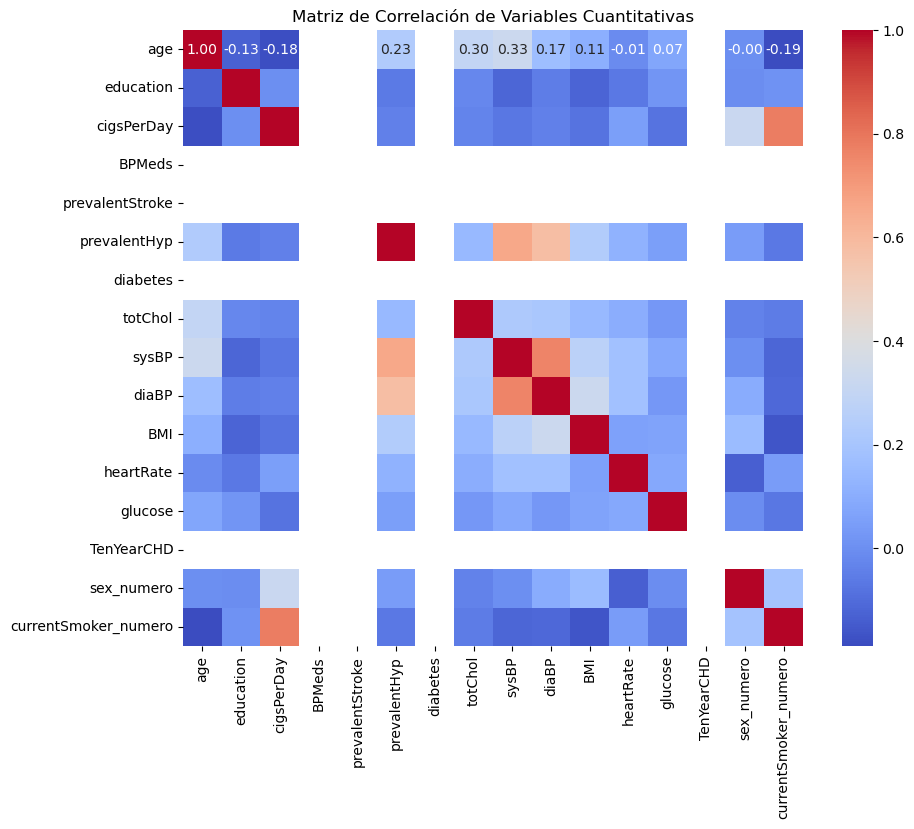

In [119]:
# Calcular la matriz de correlación
correlation = dataset_no_outliers_cuantitativas.corr()

# Graficar correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Cuantitativas")
plt.show()

<Axes: >

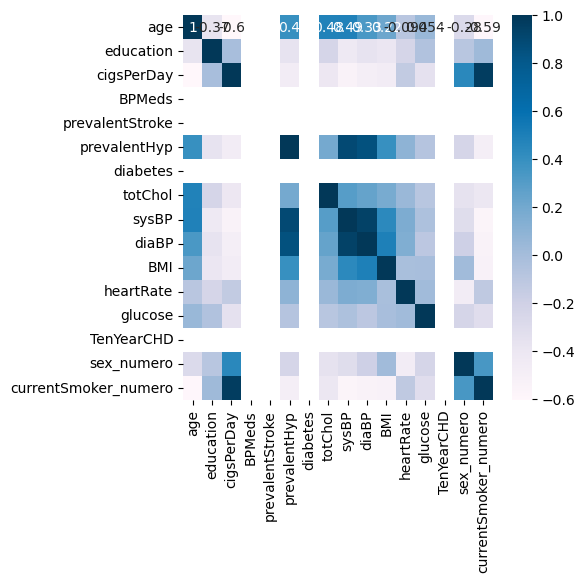

In [121]:
# Graficar las correlaciones 
plt.figure(figsize=(5,5))
sns.heatmap(correlation.corr(), annot=True, cmap=plt.cm.PuBu)

# sysBP y diaBP (presión diastólica): correlación positiva  ambas son medidas de la presión arterial y suelen aumentar o disminuir juntas.
# prevalentHyp y sysBP: Correlación de aproximadamente 0.3.si es hipertenso la presión arterial sistólica estará afectada # prevalentHyp y diaBP: Correlación también moderada 0.17 si es hipertenso la presión arterial distólica estará afectada 
# cigsPerDay y currentSmoker : Correlacion positiva si es fumador se relacionada con la cantidad de cigarrillos promedio por dia





<left><h1> <font color='yellow'>5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?
</font></h1><left>

In [125]:
df_Total=dataset_no_outliers_cuantitativas.value_counts().sum()
df_Total


2638

In [127]:
dataset_no_outliers_cuantitativas['BMI_int64'] = dataset_no_outliers_cuantitativas['BMI'].astype('int64') 
dataset_no_outliers_cuantitativas.dtypes


age                       int64
education               float64
cigsPerDay              float64
BPMeds                  float64
prevalentStroke           int64
prevalentHyp              int64
diabetes                  int64
totChol                 float64
sysBP                   float64
diaBP                   float64
BMI                     float64
heartRate               float64
glucose                 float64
TenYearCHD                int64
sex_numero                int64
currentSmoker_numero      int64
BMI_int64                 int64
dtype: object

In [129]:



# Calcular el mayor cuartil de BMI
BMI_cuartil = dataset_no_outliers_cuantitativas['BMI'].quantile(0.75)

# Filtrar los datos para el mayor cuartil de BMI y calcular la probabilidad de que sea hombre
high_BMI_data = dataset_no_outliers_cuantitativas[dataset_no_outliers_cuantitativas['BMI'] >= BMI_cuartil]
Probab_hombre_Mayor_BMI = high_BMI_data['sex_numero'].value_counts(normalize=True).get(1, 0)
print("Probabilidad de que sea hombre dado que está en el mayor cuartil de BMI:", Probab_hombre_Mayor_BMI)




Probabilidad de que sea hombre dado que está en el mayor cuartil de BMI: 0.5242424242424243


<left><h1> <font color='yellow'>6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica
</font></h1><left>

In [136]:
heart_rate_data = dataset_no_outliers_cuantitativas['heartRate']

# Realizar la prueba t para comparar la media con el valor hipotético de 75
t_stat, p_value = stats.ttest_1samp(heart_rate_data, 75)

# Mostrar resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Interpretación
alpha = 0.05  # Nivel de significancia común
if p_value < alpha:
    print("Rechazamos la hipótesis nula: el ritmo cardíaco promedio no es 75.")
else:
    print("No rechazamos la hipótesis nula: el ritmo cardíaco promedio podría ser 75.")

Estadístico t: -1.955061585594976
Valor p: 0.05068130067204524
No rechazamos la hipótesis nula: el ritmo cardíaco promedio podría ser 75.


<left><h1> <font color='yellow'>7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica
</font></h1><left>


In [139]:
# Filtrar los datos para incluir solo a los pacientes fumadores
smokers_data = dataset_no_outliers_cuantitativas[dataset_no_outliers_cuantitativas['currentSmoker_numero'] == 1]

# Dividir los datos según el género (hombre = 1, mujer = 0)
hombres_smokers = smokers_data[smokers_data['sex_numero'] == 1]['cigsPerDay']
mujeres_smokers = smokers_data[smokers_data['sex_numero'] == 0]['cigsPerDay']

# Realizar la prueba t para comparar el consumo promedio de cigarrillos entre hombres y mujeres fumadores
t_stat_gender, p_value_gender = stats.ttest_ind(hombres_smokers, mujeres_smokers, nan_policy='omit')

# Mostrar resultados
print("Estadístico t:", t_stat_gender)
print("Valor p:", p_value_gender)

# Interpretación
alpha = 0.05  # Nivel de significancia común
if p_value_gender < alpha:
    print("Rechazamos la hipótesis nula: ser hombre influye  en el consumo promedio de cigarrillos por día.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que ser hombre influye en el consumo de cigarrillos por día.")

Estadístico t: 14.973974561469289
Valor p: 6.856744927222916e-47
Rechazamos la hipótesis nula: ser hombre influye  en el consumo promedio de cigarrillos por día.



<left><h1> <font color='yellow'>8. Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.
</font></h1><left>


In [142]:
# Filtrar las columnas necesarias
data1 = dataset_no_outliers_cuantitativas[["BMI"]]

# Variables independientes (predictoras) y la dependiente
X = dataset_no_outliers_cuantitativas[['diabetes',  'prevalentHyp','totChol','currentSmoker_numero','age','education']]  # Puedes ajustar estas variables según sea necesario
y = dataset_no_outliers_cuantitativas['BMI']

# Agregar una constante para el término de intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     58.15
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.50e-57
Time:                        19:57:43   Log-Likelihood:                -6812.9
No. Observations:                2638   AIC:                         1.364e+04
Df Residuals:                    2632   BIC:                         1.367e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.1725 

 F-statistic: 58.15

Si el valor p es menor que 0.05, la variable es estadísticamente significativa y probablemente tiene un efecto real sobre el BMI.

Por lo tanto en este modelo, las variables prevalentHyp, totChol, currentSmoker_numero, y education son significativas.
Las variable age no es significativas, lo que indica que la edad no tiene efectos sobre el BMI .

currentSmoker_numero: Su  Coeficiente (-0.9824): Negativo y significativo.(muy pequeño)
Interpretación: Ser fumador se asocia con una disminución de 0.9824 en el BMI. Conozco personas que dejan de fumar y aumentan de peso.

education : su coeficiente (-0.5311): Negativo y significativo.
Interpretación: Un mayor nivel educativo está asociado con una disminución de 0.5311 en el BMI. Esto podría estar relacionado 
 que las personas con más educación tienden a tener un mayor conocimiento de hábitos saludables, lo cual contribuye a mantener un BMI más bajo.
 


<left><h1> <font color='yellow'>9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una
enfermedad coronaria en los próximos diez años, a partir de las variables descritas.
Verifica el balanceo de datos y evalúa tu modelo.
</font></h1><left>
